# **TASK 4**

Name : Vishalakshi Rahane

Level : Advanced

Task#4 : **Exploratory Data Analysis - Sports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
ipl_df =  pd.read_csv('matches.csv')
ipl_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
del_df =  pd.read_csv('deliveries.csv')
del_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31007,134,1,Kolkata Knight Riders,Royal Challengers Bangalore,3.0,5.0,CH Gayle,BJ Hodge,KP Pietersen,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,NaN,NaN,NaN
31008,134,1,Kolkata Knight Riders,Royal Challengers Bangalore,3.0,6.0,CH Gayle,BJ Hodge,KP Pietersen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
31009,134,1,Kolkata Knight Riders,Royal Challengers Bangalore,3.0,7.0,CH Gayle,BJ Hodge,KP Pietersen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
31010,134,1,Kolkata Knight Riders,Royal Challengers Bangalore,4.0,1.0,BJ Hodge,CH Gayle,Pankaj Singh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
ipl_df.shape
del_df.shape

(31012, 21)

In [ ]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
del_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31012 entries, 0 to 31011
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          31012 non-null  int64  
 1   inning            31012 non-null  int64  
 2   batting_team      31012 non-null  object 
 3   bowling_team      31012 non-null  object 
 4   over              31011 non-null  float64
 5   ball              31011 non-null  float64
 6   batsman           31011 non-null  object 
 7   non_striker       31011 non-null  object 
 8   bowler            31011 non-null  object 
 9   is_super_over     31011 non-null  float64
 10  wide_runs         31011 non-null  float64
 11  bye_runs          31011 non-null  float64
 12  legbye_runs       31011 non-null  float64
 13  noball_runs       31011 non-null  float64
 14  penalty_runs      31011 non-null  float64
 15  batsman_runs      31011 non-null  float64
 16  extra_runs        31011 non-null  float6

In [ ]:
discard_column = ['umpire1','umpire2','umpire3']

In [ ]:
ipl_df = ipl_df.drop(discard_column,axis=1)

In [ ]:
ipl_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [ ]:
type(ipl_df.team1.value_counts())

pandas.core.series.Series

In [ ]:
ipl_df.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

The result column in the dataset specifies whether the matched ended normally or there was a tie between the teams or the match was cancelled due to rain or some unavoidable reasons.

In [ ]:
project_name = "analysis_final" # change this (use lowercase letters and hyphens only)

# **Data Preparation and Cleaning**

Steps to follow while preparing our data
*   Load the dataset into a data frame using Pandas
*   Explore the number of rows & columns, ranges of values etc.
*   Handle missing, incorrect and invalid data
*   Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [ ]:
ipl_df.sample(10)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
485,486,2014,Cuttack,2014-05-07,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Kings XI Punjab,44,0,GJ Maxwell,Barabati Stadium
615,616,2016,Visakhapatnam,2016-05-10,Sunrisers Hyderabad,Rising Pune Supergiants,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,A Zampa,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
719,11315,2019,Mumbai,10/04/19,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,3,KA Pollard,Wankhede Stadium
675,7933,2018,Jaipur,08/05/18,Rajasthan Royals,Kings XI Punjab,Rajasthan Royals,bat,normal,0,Rajasthan Royals,15,0,JC Buttler,Sawai Mansingh Stadium
99,100,2008,Delhi,2008-05-17,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla
597,598,2016,Hyderabad,2016-04-26,Sunrisers Hyderabad,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,1,Rising Pune Supergiants,34,0,AB Dinda,"Rajiv Gandhi International Stadium, Uppal"
38,39,2017,Delhi,2017-05-02,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,6,Mohammed Shami,Feroz Shah Kotla
551,552,2015,Chandigarh,2015-05-03,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,LMP Simmons,"Punjab Cricket Association Stadium, Mohali"
418,419,2013,Raipur,2013-04-28,Delhi Daredevils,Pune Warriors,Pune Warriors,field,normal,0,Delhi Daredevils,15,0,DA Warner,Shaheed Veer Narayan Singh International Stadium
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"


# **Number of matches hosted by different cities**

In [ ]:
city_host = ipl_df.city.value_counts()
city_host

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Abu Dhabi           7
Cape Town           7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


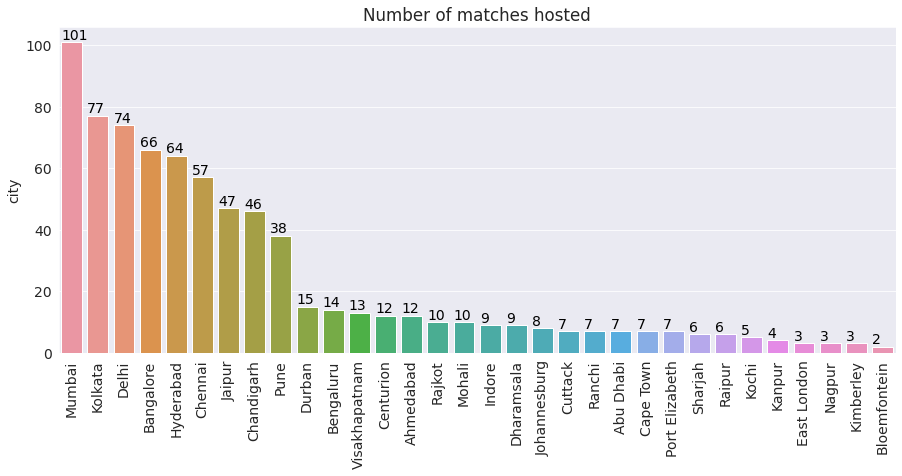

In [ ]:
plt.figure(figsize = (15,6))
plt.xticks(rotation =90)
plt.title('Number of matches hosted')
count =0
cities = pd.DataFrame(city_host)
cities['name'] = city_host.index
for i in cities['city']:
    plt.text(count-0.4,i+1,str(i),c='black')
    count+=1
sns.barplot(city_host.index,city_host);

# **Maximum Scored by Different player**

In [ ]:
bat_ings= del_df.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Run')
sorted_bat_ings = bat_ings.sort_values(by='Innings Run',ascending = False)
top_bat_scores = sorted_bat_ings[:10]
ball_faced = del_df.groupby(['match_id','batsman']).apply(lambda x: x['batsman_runs'].count()).reset_index(name = 'Balls Faced')
batsmen_performance = pd.merge(top_bat_scores,ball_faced,how='inner',left_on=['match_id','batsman'],right_on = ['match_id','batsman'])
batsmen_performance['Strike Rate for Match'] = batsmen_performance['Innings Run']*100/batsmen_performance['Balls Faced']
batsmen_innings = pd.merge(batsmen_performance,del_df,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_table = batsmen_innings.iloc[:,1:8]
batsmen_innings_table2 = batsmen_innings_table.drop_duplicates()
batsmen_innings_table2

,batsman,Innings Run,Balls Faced,Strike Rate for Match,inning,batting_team,bowling_team
0,BB McCullum,158.0,77,205.194805,1,Kolkata Knight Riders,Royal Challengers Bangalore
77,DA Warner,126.0,60,210.000000,1,Sunrisers Hyderabad,Kolkata Knight Riders
137,A Symonds,117.0,57,205.263158,1,Deccan Chargers,Rajasthan Royals
194,MEK Hussey,116.0,54,214.814815,1,Chennai Super Kings,Kings XI Punjab
248,SE Marsh,115.0,72,159.722222,1,Kings XI Punjab,Rajasthan Royals
320,ST Jayasuriya,114.0,53,215.094340,2,Mumbai Indians,Chennai Super Kings
373,AC Gilchrist,109.0,50,218.000000,2,Deccan Chargers,Mumbai Indians
423,AB de Villiers,105.0,54,194.444444,1,Delhi Daredevils,Chennai Super Kings
477,HM Amla,104.0,63,165.079365,1,Kings XI Punjab,Mumbai Indians
540,HM Amla,104.0,61,170.491803,1,Kings XI Punjab,Gujarat Lions


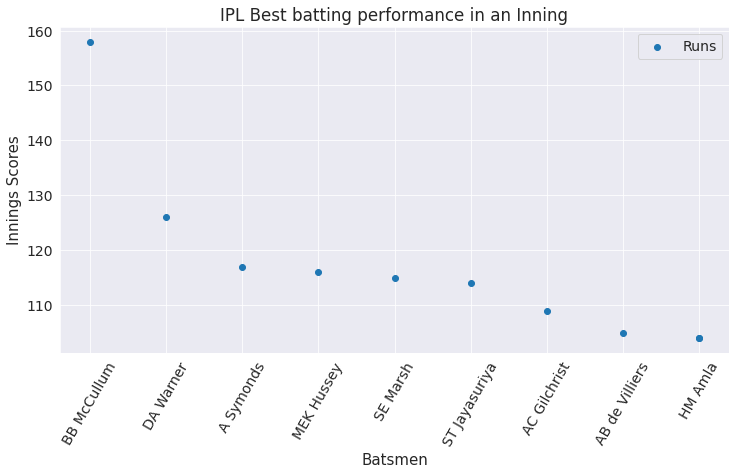

In [ ]:
x = batsmen_innings_table2['batsman']
y1 = batsmen_innings_table2['Innings Run']
plt.figure(figsize=(12,6))
plt.scatter(x,y1)
plt.xlabel('Batsmen',size =15)
plt.ylabel('Innings Scores',size=15)
plt.title('IPL Best batting performance in an Inning')
plt.xticks(rotation =60)
plt.legend(['Runs']);

# **Maximum wicket taken by a bowler**

In [ ]:
bowling_wickets = del_df[del_df['dismissal_kind']!='run out']
bowling_total = bowling_wickets.groupby('bowler').apply(lambda x : x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wicket_count = bowling_total.groupby('bowler').count().reset_index()
bowling_top = bowling_wicket_count.sort_values(by='Wickets',ascending = False)
top_bowlers= bowling_top.loc[:,['bowler','Wickets']][0:10]
top_bowlers

,bowler,Wickets
112,PP Chawla,26
22,B Kumar,26
177,Z Khan,25
138,SK Warne,25
3,A Mishra,25
4,A Nehra,24
121,RP Singh,24
68,JD Unadkat,24
151,Sohail Tanvir,22
143,SR Watson,22


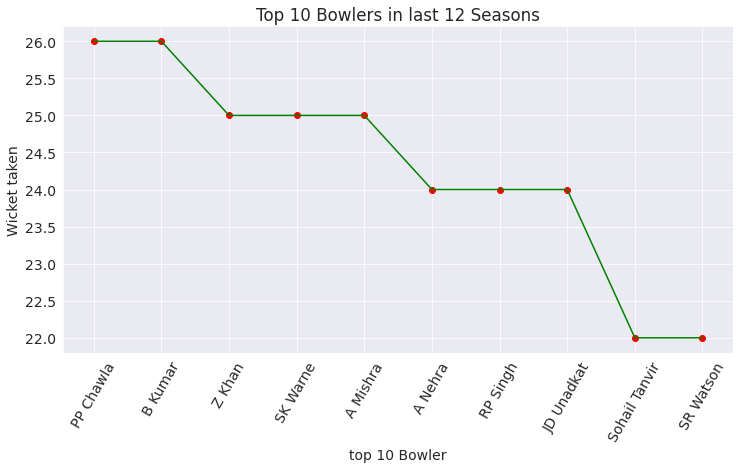

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(top_bowlers['bowler'],top_bowlers['Wickets'],color='r')
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'],color='g')
plt.xticks(rotation =60)
plt.xlabel('top 10 Bowler')
plt.ylabel('Wicket taken')
plt.title('Top 10 Bowlers in last 12 Seasons');

In [ ]:
matches_played = pd.concat([ipl_df['team1'],ipl_df['team2']])
matches_played = matches_played.value_counts().reset_index()
matches_played.columns = ['Team','Total Matches']
matches_played['wins']=ipl_df['winner'].value_counts().reset_index()['winner']


matches_played.set_index('Team',inplace =True)

In [ ]:
matches_played.reset_index()


,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Kings XI Punjab,176,84
4,Chennai Super Kings,164,82
5,Delhi Daredevils,161,75
6,Rajasthan Royals,147,67
7,Sunrisers Hyderabad,108,58
8,Deccan Chargers,75,29
9,Pune Warriors,46,13


In [ ]:
matches_played=matches_played.drop(index ='Rising Pune Supergiant')
matches_played

,Total Matches,wins
Team,,
Mumbai Indians,187,109
Royal Challengers Bangalore,180,100
Kolkata Knight Riders,178,92
Kings XI Punjab,176,84
Chennai Super Kings,164,82
Delhi Daredevils,161,75
Rajasthan Royals,147,67
Sunrisers Hyderabad,108,58
Deccan Chargers,75,29


In [ ]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage

Team
Mumbai Indians                 58.3
Royal Challengers Bangalore    55.6
Kolkata Knight Riders          51.7
Kings XI Punjab                47.7
Chennai Super Kings            50.0
Delhi Daredevils               46.6
Rajasthan Royals               45.6
Sunrisers Hyderabad            53.7
Deccan Chargers                38.7
Pune Warriors                  28.3
Gujarat Lions                  40.0
Delhi Capitals                 62.5
Rising Pune Supergiants        42.9
Kochi Tuskers Kerala           35.7
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


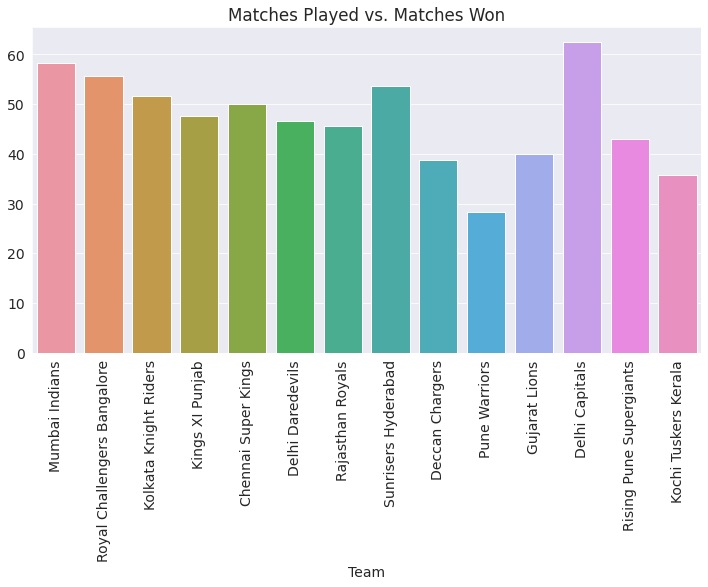

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation =90)
plt.title("Matches Played vs. Matches Won")
sns.barplot(matches_played['Total Matches'].index,win_percentage);

# **Biggest win by runs each season**

In [ ]:
season = ipl_df.season.values
year = []
for i in range(len(season)):
    year.append(int(season[i]))
ipl_df['Year'] = year
ipl_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Year
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",2017
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,2017
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,2017
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,2017
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,2019
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,2019
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,2019
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,2019


In [ ]:
y = 2008
season = []
win_by_runs_max=[]
while y<2020:
    season.append(y)
    win_by_runs_max.append(ipl_df[ipl_df['Year']==y]['win_by_runs'].max())
    y +=1
win_by_runs_max

[140, 92, 98, 111, 86, 130, 93, 138, 144, 146, 102, 118]

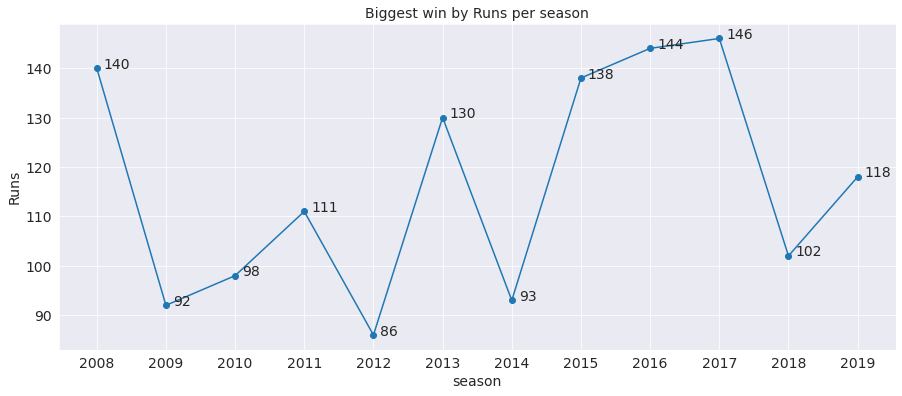

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count =0
while count <12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size =14)
    count +=1
plt.xticks(range(2008,2020),fontsize =14)
plt.xlabel('season')
plt.ylabel('Runs')
plt.title('Biggest win by Runs per season',fontsize =14)
plt.show()


# **Asking and Answering Questions**

Q1: Maximum Runs scored by a team?

In [ ]:
high_scores= del_df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores = high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
122,61,1,Chennai Super Kings,Kings XI Punjab,240.0
100,50,1,Kings XI Punjab,Mumbai Indians,230.0
101,50,2,Mumbai Indians,Kings XI Punjab,223.0
120,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,222.0
194,97,1,Kings XI Punjab,Rajasthan Royals,221.0
137,68,2,Rajasthan Royals,Deccan Chargers,217.0
83,41,2,Delhi Daredevils,Gujarat Lions,214.0
136,68,1,Deccan Chargers,Rajasthan Royals,214.0
38,20,1,Royal Challengers Bangalore,Gujarat Lions,213.0
88,44,1,Mumbai Indians,Delhi Daredevils,212.0


In [ ]:
top_team =  high_scores.sort_values(by='total_runs',ascending=False).head(10)
top_team

,match_id,inning,batting_team,bowling_team,total_runs
122,61,1,Chennai Super Kings,Kings XI Punjab,240.0
100,50,1,Kings XI Punjab,Mumbai Indians,230.0
101,50,2,Mumbai Indians,Kings XI Punjab,223.0
120,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,222.0
194,97,1,Kings XI Punjab,Rajasthan Royals,221.0
137,68,2,Rajasthan Royals,Deccan Chargers,217.0
136,68,1,Deccan Chargers,Rajasthan Royals,214.0
83,41,2,Delhi Daredevils,Gujarat Lions,214.0
38,20,1,Royal Challengers Bangalore,Gujarat Lions,213.0
88,44,1,Mumbai Indians,Delhi Daredevils,212.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


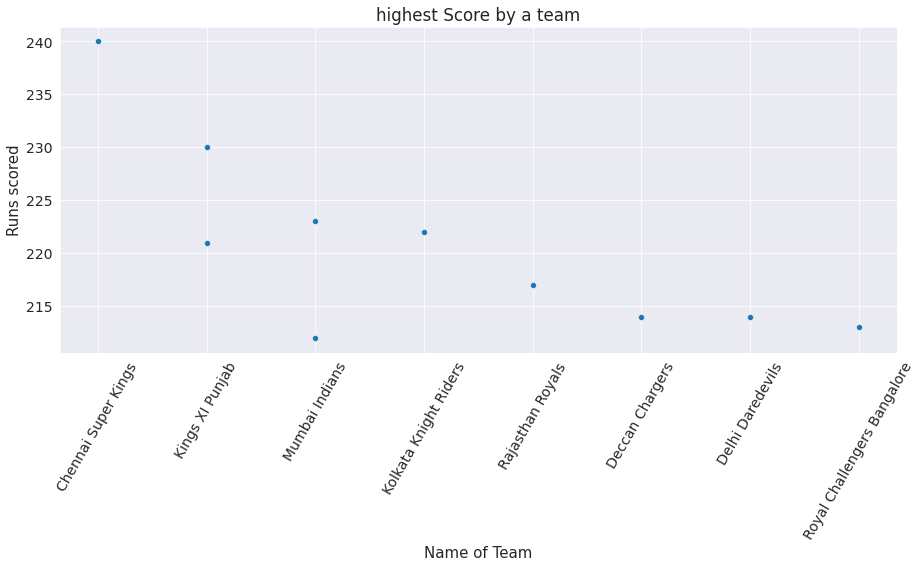

In [ ]:
x= top_team['batting_team']
y=top_team['total_runs']
plt.figure(figsize=(15,6))
plt.xlabel('Name of Team',size=15)
plt.ylabel('Runs scored',size =15)
plt.xticks(rotation =60)
plt.title('highest Score by a team')
sns.scatterplot(x,y);

**Q2: Which team has won maximum number of matches in all season?**

In [ ]:
winner = ipl_df.winner.value_counts()
winner

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


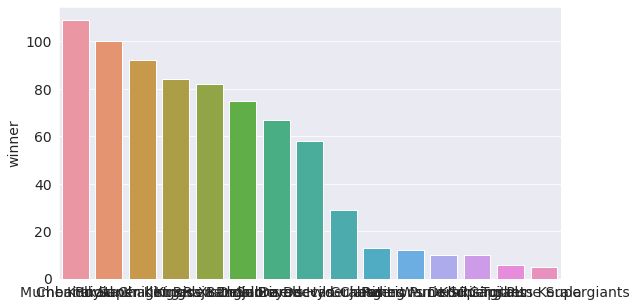

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation =75)
plt.title('Which team has won most number of time')
sns.barplot(winner.index,winner);

**Q3:Which player has won maximum number MOM award?**

In [ ]:
mom = ipl_df.player_of_match.value_counts()
mom

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
                  ..
HH Gibbs           1
TL Suman           1
S Gill             1
Shoaib Akhtar      1
RA Tripathi        1
Name: player_of_match, Length: 226, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


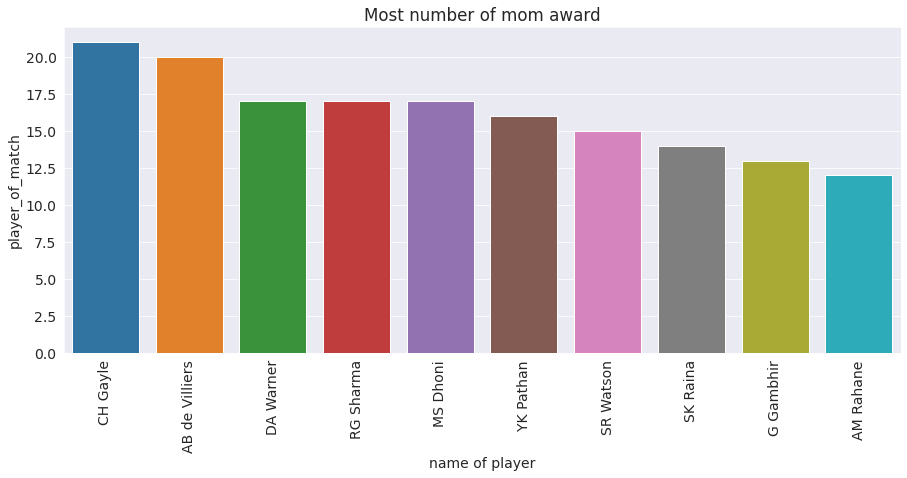

In [ ]:
mom_10 = mom[:10]
plt.figure(figsize = (15,6))
plt.xticks(rotation = 90)
plt.title('Most number of mom award')
plt.xlabel("name of player")
plt.ylabel('Number of time he has won')
sns.barplot(mom_10.index,mom_10);

**Q4: Who are the top scorer batsman?**

In [ ]:
batsmen =  del_df.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsmen_sorted =batsmen.sort_values(by='Runs',ascending=False).head(5)
batsmen_sorted

,batsman,Runs
82,G Gambhir,1071.0
217,SK Raina,965.0
216,SE Marsh,880.0
203,S Dhawan,856.0
187,RG Sharma,846.0


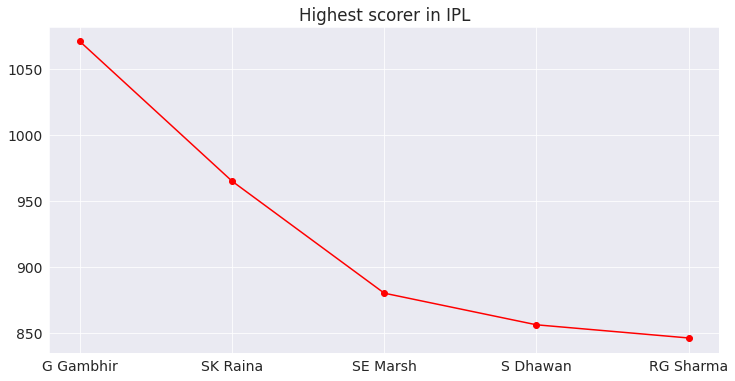

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Highest scorer in IPL')
plt.plot(batsmen_sorted['batsman'],batsmen_sorted['Runs'],'o-r');

**Q5: maximum run by which a team won??**

In [ ]:
batting_first_team = ipl_df[ipl_df.win_by_runs !=0]
batting_first_team.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Year
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",2017
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,2017
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,2017
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,2017
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,2017


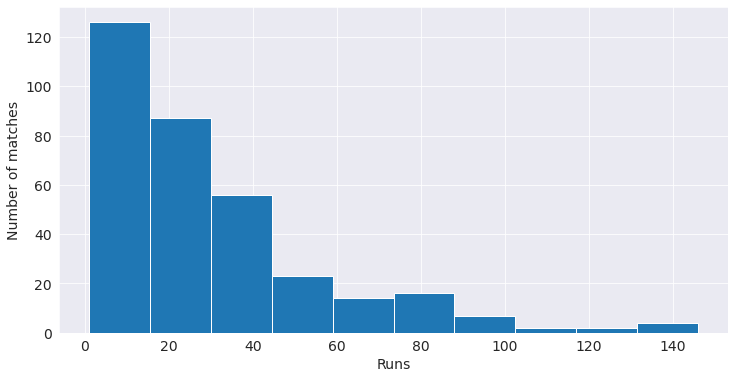

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(batting_first_team['win_by_runs'])
plt.xlabel('Runs')
plt.ylabel('Number of matches')
plt.show();